# Lead Scoring

## Problem Statement
An education company named __X Education__ sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.



The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. <br>

__When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.__<br>

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. __The typical lead conversion rate at X education is around 30%.__


Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as __‘Hot Leads’__. <br>

If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:
![image.jpg](attachment:image.jpg)



__Lead Conversion Process__ - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom.<br>

In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. <br>
The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

__The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.__




### Data

You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted.

Another thing that you also need to check out for are the levels present in the categorical variables.<br>

__Many of the categorical variables have a label called 'Select' which needs to be handled because it is as good as a null value.__



### Goal
**Build a classifier for converted column**

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

## Data Preparation

### Data Collection or Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
data = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Leads.csv'))
data.head(20)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.00,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.00,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.00,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.00,Email Opened,India,IT Projects Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.00,Email Opened,India,Finance Management,Word Of Mouth,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [14]:
#checking duplicates for prospect ID - just to ensure no duplicates
sum(data.duplicated(subset = 'Prospect ID')) == 0
# No duplicate values

True

In [15]:
sum(data.duplicated(subset = 'Lead Number')) == 0

True

### Data Inspection

In [16]:
data.shape

(9240, 37)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [18]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Cleaning

In [19]:
# As we can observe that there are select values for many column.
#This is because customer did not select any option from the list, hence it shows select.
# Select values are as good as NULL.

# Converting 'Select' values to NaN.
data = data.replace('Select', np.nan)

In [20]:
data.isnull().sum()

,0
Prospect ID,0
Lead Number,0
Lead Origin,0
Lead Source,36
Do Not Email,0
Do Not Call,0
Converted,0
TotalVisits,137
Total Time Spent on Website,0
Page Views Per Visit,137


In [21]:
round(100*(data.isnull().sum()/len(data.index)), 2)

,0
Prospect ID,0.00
Lead Number,0.00
Lead Origin,0.00
Lead Source,0.39
Do Not Email,0.00
Do Not Call,0.00
Converted,0.00
TotalVisits,1.48
Total Time Spent on Website,0.00
Page Views Per Visit,1.48


In [22]:
len(data)

9240

In [24]:
# Threshold for dropping columns (25% of total rows)
threshold = len(data) * 0.30
data.isnull().sum() <= threshold

,0
Prospect ID,True
Lead Number,True
Lead Origin,True
Lead Source,True
Do Not Email,True
Do Not Call,True
Converted,True
TotalVisits,True
Total Time Spent on Website,True
Page Views Per Visit,True


In [25]:
# we will drop the columns having more than 25% NA values.
#data = data.drop(data.loc[:,list(round(100*(data.isnull().sum()/len(data.index)), 2)>25)].columns, 1)

# Threshold for dropping columns (30% of total rows)
threshold = len(data) * 0.30

# Drop columns with more than 30% null values
data = data.loc[:, data.isnull().sum() <= threshold] #from begining till end whichever row meets the condition, keep it.


In [ ]:
# Now we will take care of null values in each column one by one.

In [ ]:
# Lead Quality: Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead

In [29]:
data.isnull().sum()

,0
Prospect ID,0
Lead Number,0
Lead Origin,0
Lead Source,36
Do Not Email,0
Do Not Call,0
Converted,0
TotalVisits,137
Total Time Spent on Website,0
Page Views Per Visit,137


In [30]:
data.shape

(9240, 27)

In [ ]:
#Lead source(cat), TotalVisits(num), Page Views Per Visit(num), Last Activity(cat) columns still have nulls which we need to take care of

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [34]:
data['Lead Source'].mode()

,Lead Source
0,Google


In [35]:
data['Lead Source'].fillna(data['Lead Source'].mode()[0],inplace=True)
data['Last Activity'].fillna(data['Last Activity'].mode()[0],inplace=True)
data['Country'].fillna(data['Country'].mode()[0],inplace=True)
data['What is your current occupation'].fillna(data['What is your current occupation'].mode()[0],inplace=True)
data['What matters most to you in choosing a course'].fillna(data['What matters most to you in choosing a course'].mode()[0],inplace=True)

<Axes: xlabel='Page Views Per Visit', ylabel='Count'>

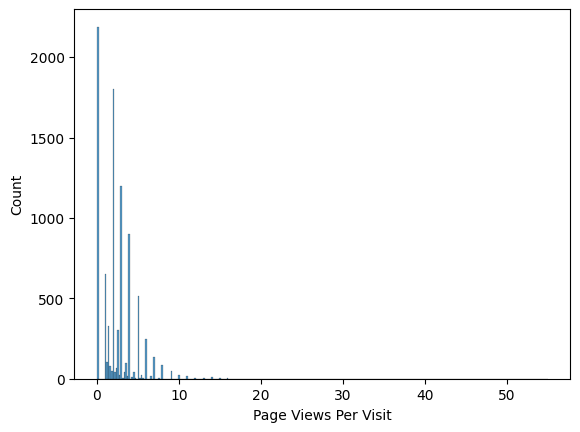

In [38]:
sns.histplot(data['Page Views Per Visit'])

In [39]:
data['TotalVisits'].fillna(data['TotalVisits'].median(),inplace=True)
data['Page Views Per Visit'].fillna(data['Page Views Per Visit'].median(),inplace=True)

In [40]:
data.isnull().sum()

,0
Prospect ID,0
Lead Number,0
Lead Origin,0
Lead Source,0
Do Not Email,0
Do Not Call,0
Converted,0
TotalVisits,0
Total Time Spent on Website,0
Page Views Per Visit,0


In [41]:
data.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened


In [42]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [46]:
data['Lead Source'].value_counts()

,count
Lead Source,
Google,2904
Direct Traffic,2543
Olark Chat,1755
Organic Search,1154
Reference,534
Welingak Website,142
Referral Sites,125
Facebook,55
bing,6


In [47]:
for column in data.columns:
  if data[column].dtype == 'object':
    print(f'Value counts for {column}:')
    print(data[column].value_counts())

Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: count, Length: 9240, dtype: int64
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
Lead Source
Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call      

In [48]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [51]:
data = data.drop(['Prospect ID', 'Lead Number', 'Do Not Call', 'What matters most to you in choosing a course', 'Search', 'Magazine','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque'], axis=1)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Country                                 9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   obje

In [53]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Label Encoding categorical variables
label_encoders = {}
for column in data.columns:
  if data[column].dtype == 'object':
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [54]:
data

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,0,6,0,0,0.0,0,0.00,10,12,4,0,8
1,0,7,0,0,5.0,674,2.50,5,12,4,0,4
2,1,1,0,1,2.0,1532,2.00,5,12,3,1,4
3,1,1,0,0,1.0,305,1.00,13,12,4,0,8
4,1,3,0,1,2.0,1428,1.00,1,12,4,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,1,1,1,8.0,1845,2.67,4,25,4,0,3
9236,1,1,0,0,2.0,238,2.00,12,12,4,1,12
9237,1,1,1,0,2.0,199,2.00,12,12,4,1,12
9238,1,3,0,1,3.0,499,3.00,12,12,4,0,12


In [55]:
from sklearn.model_selection import train_test_split

# Define the features and target variable (assuming 'Monthly Income' as target)
X = data.drop(['Converted'], axis=1)
y = data['Converted']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC #support vector classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'SVC': SVC(kernel='poly')
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n")


Logistic Regression Results:
Accuracy: 0.7822510822510822
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83      1404
           1       0.76      0.65      0.70       906

    accuracy                           0.78      2310
   macro avg       0.78      0.76      0.76      2310
weighted avg       0.78      0.78      0.78      2310

Confusion Matrix:
 [[1222  182]
 [ 321  585]]


Naive Bayes Results:
Accuracy: 0.7727272727272727
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82      1404
           1       0.75      0.63      0.69       906

    accuracy                           0.77      2310
   macro avg       0.77      0.75      0.75      2310
weighted avg       0.77      0.77      0.77      2310

Confusion Matrix:
 [[1214  190]
 [ 335  571]]


SVC Results:
Accuracy: 0.6926406926406926
Classification Report:
               precision    r